In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


##### First we get the price of a Microsoft stock as quoted on an exchange and then we show the Data

In [2]:
Microsoft_stock = web.DataReader('MSFT', data_source='yahoo', start='2010-01-01', end='2019-12-09') 
Microsoft_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,24.360727
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,24.368599
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,24.219046
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.967175
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,24.132469
2010-01-11,30.760000,30.120001,30.709999,30.270000,68754700.0,23.825497
2010-01-12,30.400000,29.910000,30.150000,30.070000,65912100.0,23.668074
2010-01-13,30.520000,30.010000,30.260000,30.350000,51863500.0,23.888464
2010-01-14,31.100000,30.260000,30.309999,30.959999,63228100.0,24.368599


#### Visualize the closing price history

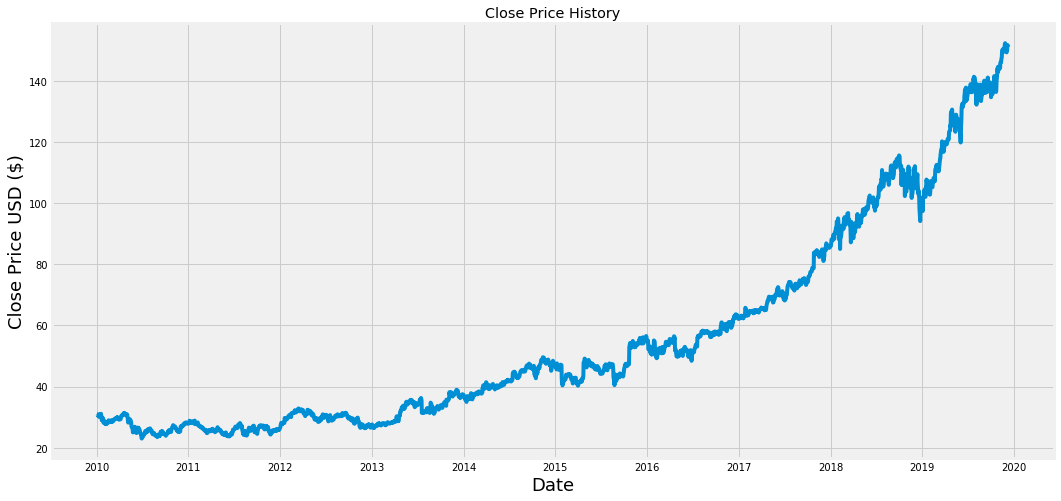

In [3]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(Microsoft_stock['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

##### We will Create a new data frame with only the closing price and convert it to an array. Then create a variable to store the length of the training data set. I want the training data set to contain about 80% of the data.

In [4]:
data = Microsoft_stock.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.9)

##### Now we will scale the data set to be values between 0 and 1 inclusive, because it is generally good practice to scale your data before giving it to the neural network.

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

##### Then we create a training data set that contains the past 60 day closing price values that we want to use to predict the 61st closing price value.

##### So the first column in the ‘x_train’ data set will contain values from the data set from index 0 to index 59 (60 values total) and the second column will contain values from the data set from index 1 to index 60 (60 values) and so on and so forth.

##### The ‘y_train’ data set will contain the 61st value located at index 60 for it’s first column and the 62nd value located at index 61 of the data set for it’s second value and so on and so forth.

In [6]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
#Convert x_train and y_train to numpy arrays so we can use them for training the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

#A LSTM network expects the input to be 3-Dimensional in the form [samples, time steps, features]:
# samples is the number of data points (or rows/ records) we have, 
# time steps is the number of time-dependent steps that are there in a single data point (60),
# features/indicators refers to the number of variables we have for the corresponding true value in Y, since we are only using one feature 'Close',
# the number of features/indicators will be one
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

#### Build the LSTM model to have two LSTM layers with 50 neurons and two Dense layers, one with 25 neurons and the other with 1 neuron.

In [7]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False)) 
model.add(Dense(units=25))
model.add(Dense(units=1))

##### Compile the model using the mean squared error (MSE) loss function and the adam optimizer.

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')

##### Train the model using the training data sets. Note, fit is another name for train. Batch size is the total number of training examples present in a single batch, and epoch is the number of iterations when an entire data set is passed forward and backward through the neural network.

In [9]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
2192/2192 [==============================] - 134s 61ms/step - loss: 7.1490e-04


#### Create a test data set

##### Then we will convert x_test to a numpy array so we can use it to test and make predictions using the LSTM model we created.

##### Then we will reshape the data to be 3-dimensional in the form [number of samples, number of time steps, and number of features]. This needs to be done, because the LSTM model is expecting a 3-dimensional data set.

In [10]:
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1)) #Reshaping the variable to be 3-Dimensional in the form [samples, time steps, features] for the Neural Network

#### Now get the predicted values from the model using the test data.

In [11]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) 

##### Get the root mean squared error (RMSE), which is a good measure of how accurate the model is. A value of 0 would indicate that the models predicted values match the actual values from the test data set perfectly.

##### The lower the value the better the model performed. But usually it is best to use other metrics as well to truly get an idea of how well the model performed.

In [12]:
rmse=np.sqrt(np.mean((predictions- y_test)**2))
rmse

2.5744515094846014

C:\anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


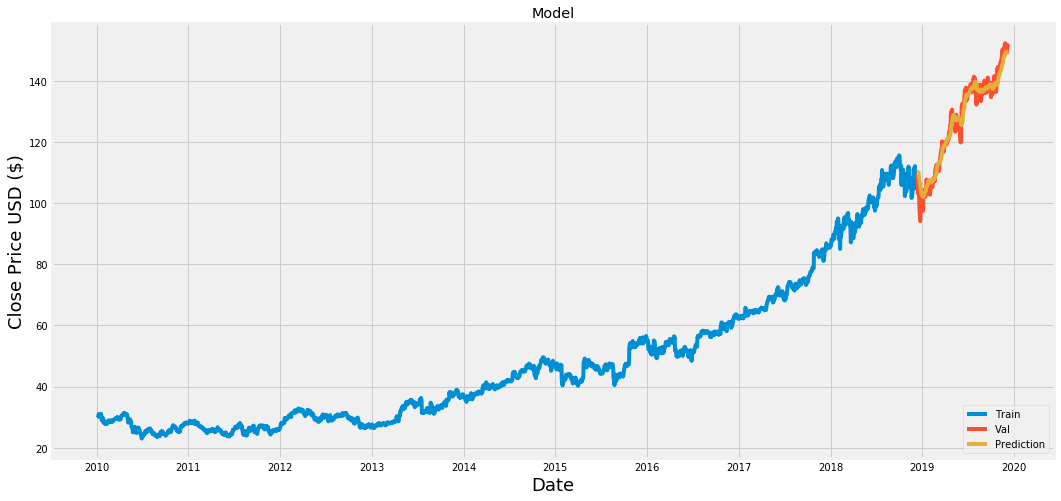

In [13]:
#Plot the data
train = data[:training_data_len] 
valid = data[training_data_len:]  
valid['Predictions'] = predictions 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()

### Now we can see the valid/actual/close prices and predicted prices

In [14]:
valid

,Close,Predictions
Date,,
2018-12-13,109.449997,110.059242
2018-12-14,106.029999,110.154816
2018-12-17,102.889999,109.973228
2018-12-18,103.970001,109.381500
2018-12-19,103.690002,108.733894
2018-12-20,101.510002,108.082771
2018-12-21,98.230003,107.287956
2018-12-24,94.129997,106.191727
2018-12-26,100.559998,104.662376


### I want to test the model some more and get the predicted closing price value of Microsoft for December 10, 2019 (12/10/2019).

##### So I will get the quote, convert the data to an array that contains only the closing price. Then I will get the last 60 day closing price and scale the data to be values between 0 and 1 inclusive.

##### After that I will create an empty list and append the past 60 day price to it, and then convert it to a numpy array and reshape it so that I can input the data into the model.

##### I will input the data into the model and get the predicted price.

In [15]:
microsoft_quote = web.DataReader('MSFT', data_source='yahoo', start='2010-01-01', end='2019-12-09') 
new_df = microsoft_quote.filter(['Close']) 
last_60_days = new_df[-60:].values 
last_60_days_scaled  = scaler.transform(last_60_days) 
X_test = [] 
X_test.append(last_60_days_scaled) 
X_test = np.array(X_test) 
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test) 

pred_price = scaler.inverse_transform(pred_price) 
print(pred_price)

[[149.52744]]


### Now let’s see what the actual price for that day was.

In [16]:
todays_price = web.DataReader('MSFT', data_source='yahoo', start='2019-12-10', end='2019-12-10')
print(todays_price['Close'])

Date
2019-12-10    151.130005
2019-12-11    151.699997
Name: Close, dtype: float64
